In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

HERE I WILL OPEN THE SPECIFIC FILE LOCATION WHERE MY DATASET IS LOCATED USING PANDAS LIBRARY AND ANALYSIS THE DATA TO PREPROCESSING STAGE

In [2]:
# read the csv file into the pandas dataframe, df
df = pd.read_csv(r'C:\Users\igboj\Desktop\datasets\IMDB Dataset.csv',header=0,sep=",")

# print the size of the dataframe
print(df.shape)

(50000, 2)


In [3]:
# print a random sample of 10 rows from the dataframe
random_state = 54321
display(df.sample(n=10, random_state=random_state))

,review,sentiment
16946,"This was a horrible film! I gave it 2 Points, ...",negative
16719,The widower family man Dan Burns (Steve Carell...,positive
27113,I once lived with a roommate who attempted sui...,positive
22089,Payback is the game being played in this drama...,negative
44872,The film portrays France's unresolved problems...,negative
46478,BLACK WATER has to be one of the best Australi...,positive
956,"Great premise, poor execution. Cast of great a...",negative
24642,No spoilers here but I have been a fan since W...,negative
8172,"Sui generis. Folks, I'm not going to lie to yo...",positive
35506,"I went into this with my hopes up, by twenty m...",negative


In [4]:
# print summary info on each column of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [5]:
print(df.isna().sum().sort_values(ascending=False))

review       0
sentiment    0
dtype: int64


In [6]:
print(df.sentiment.unique())

['positive' 'negative']


In [7]:
# print the proportion of positive and negative sentiments in the data set
df.sentiment.value_counts(ascending=False, normalize=True)

sentiment
positive    0.5
negative    0.5
Name: proportion, dtype: float64

DATA VISULISATION STAGE TO CHECK THE DISTRIBUTION OF THE REVIEWS 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='ticks', palette='BrBG')

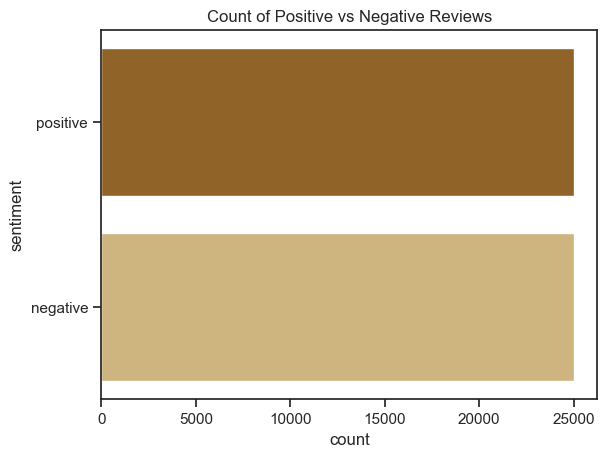

In [9]:
sns.countplot(data=df, y='sentiment')\
   .set(title='Count of Positive vs Negative Reviews')

plt.show()

In [10]:
def print_random_review() -> None:
    # select and print a random review in full
    random_review = df.review.sample(n=1, random_state=random_state).values
    print(random_review[0])

print_random_review()

This was a horrible film! I gave it 2 Points, one for Angelina Jolie and a second one for the beautiful Porsche in the beginning... Other than that the story just plain sucked and cars racing through cities wasn't so new in 1970. The Happyend was probably what annoyed me the most, seldomly seen anything so constructed!


DATA PREPROCESSING AND REMOVAL OF STOP WORDS 

In [11]:
import re

def remove_html_tags(text: str) -> str:
    # find and replace html tag patterns in text
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

# apply the function to reviews
df['review'] = df.review.apply(remove_html_tags)

print_random_review()

This was a horrible film! I gave it 2 Points, one for Angelina Jolie and a second one for the beautiful Porsche in the beginning... Other than that the story just plain sucked and cars racing through cities wasn't so new in 1970. The Happyend was probably what annoyed me the most, seldomly seen anything so constructed!


In [12]:
def remove_urls(text: str) -> str:
    # find and replace url patterns in text
    pattern= re.compile(r'https?://\S+|www\.\S+', flags=re.IGNORECASE)
    return pattern.sub(r'', text)

# apply the function to reviews
df['review'] = df.review.apply(remove_urls)

print_random_review()

This was a horrible film! I gave it 2 Points, one for Angelina Jolie and a second one for the beautiful Porsche in the beginning... Other than that the story just plain sucked and cars racing through cities wasn't so new in 1970. The Happyend was probably what annoyed me the most, seldomly seen anything so constructed!


In [13]:
df['review'] = df.review.str.lower()

print_random_review()

this was a horrible film! i gave it 2 points, one for angelina jolie and a second one for the beautiful porsche in the beginning... other than that the story just plain sucked and cars racing through cities wasn't so new in 1970. the happyend was probably what annoyed me the most, seldomly seen anything so constructed!


In [14]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igboj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
stop_words_set = set(stopwords.words('english'))

print(stop_words_set)

def remove_stop_words(text: str) -> str:
    # splits text into list or words, and iterates through to
    # return only words that are not in stop_words_set
    words = [word for word in text.split() if word not in stop_words_set]
    return " ".join(words)

df['review'] = df.review.apply(remove_stop_words)

print_random_review()

{'him', 'now', 'because', 'them', 'more', 'should', 'm', 'you', "hadn't", 'our', "should've", 're', 'as', 'other', 'such', 'by', 'few', 'then', 'no', 'through', 'does', 'from', 'over', 'any', 'hasn', 'it', 'yours', 'these', 'a', 'that', 'which', 'if', 'am', 'they', 'myself', 'herself', 'didn', 's', 'not', "doesn't", 'are', 'was', "won't", 'while', 'itself', 'being', 'when', 'her', "you've", 'me', 'we', 'my', 'for', 'd', "haven't", 'yourselves', 'against', "shan't", 'only', 'be', "you'll", 'how', 'each', 'wasn', 'y', 'did', "you'd", 'he', 'doing', 'll', 'do', 'below', 'during', 'shouldn', "shouldn't", 'at', 'with', 'themselves', "aren't", 'what', 'were', 'i', 'up', 'whom', "hasn't", "mightn't", 've', 'to', 'wouldn', 'between', 'the', 'above', 'own', 'further', 'out', 'and', 'shan', 'who', 'where', 'theirs', 'mightn', 'very', "that'll", 'had', 'so', 'an', 'mustn', "weren't", 'o', 'down', 'been', 'or', 'there', 'can', "isn't", "wasn't", 'himself', 'most', "she's", 'ma', 'before', 'his', '

In [17]:
import string

def remove_punctuations(text: str) -> str:
    return text.translate(str.maketrans('', '', string.punctuation))

# apply the function to reviews
df['review'] = df.review.apply(remove_punctuations)

print_random_review()

horrible film gave 2 points one angelina jolie second one beautiful porsche beginning story plain sucked cars racing cities new 1970 happyend probably annoyed most seldomly seen anything constructed


In [18]:
df['review'] = df.review.str.replace(r'\d+', r'', regex=True)

print_random_review()

horrible film gave  points one angelina jolie second one beautiful porsche beginning story plain sucked cars racing cities new  happyend probably annoyed most seldomly seen anything constructed


In [19]:
from textblob import Word

nltk.download('wordnet')

def lemmatize_words(text: str) -> str:
    words = [Word(word).lemmatize() for word in text.split()]
    return " ".join(words)

# apply function to review
df['review'] = df.review.apply(lemmatize_words)

print_random_review()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igboj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


horrible film gave point one angelina jolie second one beautiful porsche beginning story plain sucked car racing city new happyend probably annoyed most seldomly seen anything constructed


In [20]:
sentiment_map = {'positive':1, 'negative':0}

df['sentiment'] = df.sentiment.replace(sentiment_map).astype(int)

df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1


MODEL BULIDING 
Forecasting whether a review's sentiment leans towards positivity or negativity presents a Natural Language Processing hurdle that lends itself to solutions via either a binary classification approach or deep learning techniques.

In tackling this task, I aim to investigate employing the Multinomial Naive Bayes Classifier as the foundational model, contrasting it with a Long Short-Term Memory (LSTM) based TensorFlow model.

Initially, we partition the dataset into training and test sets, allocating 70% for training and 30% for testing while maintaining the distribution of the target variable.

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.review.values,
    df.sentiment.values,
    test_size=.3,
    random_state=random_state,
    stratify=df.sentiment.values
)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training set and transform them into feature vectors
X_train = vectorizer.fit_transform(x_train)

# Transform the test set into feature vectors
X_test = vectorizer.transform(x_test)

In [23]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the MNB classifier
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)

MultinomialNB
MultinomialNB()

MultinomialNB()

In [24]:
import tensorflow as tf
from tensorflow.keras import backend as K

In [25]:
%env TF_CPP_MIN_LOG_LEVEL=0

env: TF_CPP_MIN_LOG_LEVEL=0


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer

K.clear_session()

max_words = 10000  # Maximum number of words to keep in the vocabulary
max_len = 100  # Maximum length of input sequences

# tokenize the training data set
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

In [27]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the MNB classifier
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [28]:
import tensorflow as tf
from tensorflow.keras import backend as K

In [29]:
%env TF_CPP_MIN_LOG_LEVEL=0

env: TF_CPP_MIN_LOG_LEVEL=0


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer

K.clear_session()

max_words = 10000  # Maximum number of words to keep in the vocabulary
max_len = 100  # Maximum length of input sequences

# tokenize the training data set
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_sequence = pad_sequences(
    tokenizer.texts_to_sequences(x_train),
    maxlen=max_len,
    padding='post'
)

X_test_sequence = pad_sequences(
    tokenizer.texts_to_sequences(x_test),
    maxlen=max_len,
    padding='post'
)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Embedding, LSTM, SpatialDropout1D

# Instantiate and build the LSTM model
tf_model = Sequential()
tf_model.add(Embedding(input_dim=max_words, output_dim=128))
tf_model.add(Conv1D(128, 5, activation='relu'))
tf_model.add(SpatialDropout1D(0.4))
tf_model.add(LSTM(units=128, recurrent_dropout=0.2, dropout=0.2))
tf_model.add(Dense(units=32, activation='relu'))
tf_model.add(Dense(units=1, activation='sigmoid'))
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the tensorflow model summary
tf_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         82048     
                                                                 
 spatial_dropout1d (Spatial  (None, None, 128)         0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                       

In [33]:
history = tf_model.fit(X_train_sequence, y_train, 
            epochs=5, 
            batch_size=32, 
            validation_split=0.2
)

Epoch 1/5


875/875 [==============================] - 194s 216ms/step - loss: 0.4706 - accuracy: 0.7608 - val_loss: 0.3348 - val_accuracy: 0.8620
Epoch 2/5
875/875 [==============================] - 176s 201ms/step - loss: 0.2720 - accuracy: 0.8899 - val_loss: 0.3291 - val_accuracy: 0.8577
Epoch 3/5
875/875 [==============================] - 171s 195ms/step - loss: 0.2097 - accuracy: 0.9202 - val_loss: 0.3241 - val_accuracy: 0.8637
Epoch 4/5
875/875 [==============================] - 172s 196ms/step - loss: 0.1621 - accuracy: 0.9426 - val_loss: 0.3768 - val_accuracy: 0.8619
Epoch 5/5
258/875 [=======>......................] - ETA: 1:48 - loss: 0.1067 - accuracy: 0.9650

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Predict the sentiment for the test set with the Naive Bayes classifier model
mnb_predictions = mnb_classifier.predict(X_test)

mnb_score = accuracy_score(y_test, mnb_predictions, normalize=True)

print(f'Naive Bayes model Accuracy Score: {mnb_score * 100:.2f}% \n')

print('Naive Bayes model Classification Report:\n')

print(classification_report(y_test, mnb_predictions, target_names=['negative', 'positive']))

In [ ]:
# Test and score the tensorflow model on test data sequence
loss, tf_accuracy = tf_model.evaluate(X_test_sequence, y_test)

tf_predictions = (tf_model.predict(X_test_sequence)>=0.5).astype(int)

In [ ]:
print(f'LSTM model Accuracy Score: {tf_accuracy * 100:.2f}%\n')

print('LSTM model Classification Report:\n')

print(classification_report(y_test, tf_predictions, target_names=['negative', 'positive']))

The LSTM deep learning model, developed using TensorFlow, exhibits a marginally superior accuracy rate of 85.91% compared to the Multinomial Naive Bayes model's accuracy rate of 85.45%.

In terms of performance metrics, the deep learning model demonstrates a precision and recall of 86%, whereas the classifier model achieves a precision of 87% and a recall of 83%.

Overall, both models display similar performance, and they have the potential for further enhancement through hyperparameter tuning and additional training to achieve even greater accuracy.